In [1]:
from utils import *
import pandas as pd

In [2]:
result_files, skip_sample_ids, selected_annotators, num_annotators = process_result_files()
# print(result_files)
halu_labels_list = [['Unwanted'], ['Unwanted', 'Questionable'], ['Unwanted', 'Questionable', 'Benign']]
poolings = ['worst-pooling', 'best-pooling']

for halu_labels in halu_labels_list:
    for pooling in poolings:
        # Get six variables
        globals()["halu_eval-" + ''.join([label[0] for label in halu_labels]) + '-' + pooling.split('-')[0]]= HaluEvaluator(result_files, sample_pooling=pooling, halu_labels=halu_labels, skip_sample_ids=skip_sample_ids, selected_annotators=selected_annotators, num_annotators=num_annotators)
        locals()["halu_eval-" + ''.join([label[0] for label in halu_labels]) + '-' + pooling.split('-')[0]].process_results()
   

total_sample_count 750
total_sample_count 750
total_sample_count 750
total_sample_count 750
total_sample_count 750
total_sample_count 750


## Hallucination Ranking Table

In [3]:
# Get halu rate
halu_rate_results = {}
columns = []
for halu_labels in halu_labels_list:
    for pooling in poolings:
        halu_result = locals()["halu_eval-" + ''.join([label[0] for label in halu_labels]) + '-' + pooling.split('-')[0]].compute_halu_rate()
        for model, rate in halu_result.items():
            if model not in halu_rate_results:
                halu_rate_results[model] = []
            halu_rate_results[model].append(rate)
        columns.append(''.join([label[0] for label in halu_labels]) + '-' + pooling.split('-')[0])
halu_rate_results_df = pd.DataFrame.from_dict(halu_rate_results, orient='index', columns=columns)

# Get ranking df
df_ranked = halu_rate_results_df.copy()
## Apply ranking for each column in reverse order
for column in df_ranked.columns:
    df_ranked[column] = df_ranked[column].astype(float).rank(ascending=True, method='min').astype(int)

# Combine original scores with ranks in the desired format
df_combined = halu_rate_results_df.applymap(str) + "/" + df_ranked.applymap(str)
model_orders = ['GPT-4o', 'GPT-3.5-Turbo', 'Llama-3.1-70B', 'Gemini-1.5-Flash', 'Llama-3.1-8B', 
                'Claude-3.5-Sonnet', 'Qwen2.5-7B', 'Phi-3-mini', 'Command-R', 'Mistral-7B']

# Sorting the DataFrame based on the given model list
df_sorted = df_combined.loc[model_orders]
df_sorted['HHEM Ldbd'] = list(range(1, 11))

# Display or further process the sorted DataFrame
# print(df_sorted.to_latex())
df_sorted


/var/folders/27/mcs38ydx4n76wzm1g1yy7vxr0000gn/T/ipykernel_97584/1224495651.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_combined = halu_rate_results_df.applymap(str) + "/" + df_ranked.applymap(str)


,U-worst,U-best,UQ-worst,UQ-best,UQB-worst,UQB-best,HHEM Ldbd
GPT-4o,40.0/1,2.67/1,53.33/1,14.67/2,66.67/2,37.33/1,1
GPT-3.5-Turbo,44.0/2,9.33/5,53.33/1,18.67/3,61.33/1,44.0/2,2
Llama-3.1-70B,48.0/3,4.0/2,54.67/3,9.33/1,68.0/3,49.33/3,3
Gemini-1.5-Flash,56.0/6,14.67/7,64.0/5,22.67/5,69.33/4,54.67/5,4
Llama-3.1-8B,53.33/5,13.33/6,66.67/6,22.67/5,77.33/5,49.33/3,5
Claude-3.5-Sonnet,48.0/3,4.0/2,61.33/4,20.0/4,82.67/7,61.33/6,6
Qwen2.5-7B,73.33/10,18.67/9,78.67/9,33.33/10,85.33/9,66.67/8,7
Phi-3-mini,65.33/7,18.67/9,74.67/7,30.67/8,80.0/6,70.67/9,8
Command-R,68.0/8,6.67/4,84.0/10,22.67/5,92.0/10,70.67/9,9
Mistral-7B,69.33/9,14.67/7,77.33/8,32.0/9,84.0/8,65.33/7,10


## Annotation-level disttribution of annotation labels for the three hallucination labels only

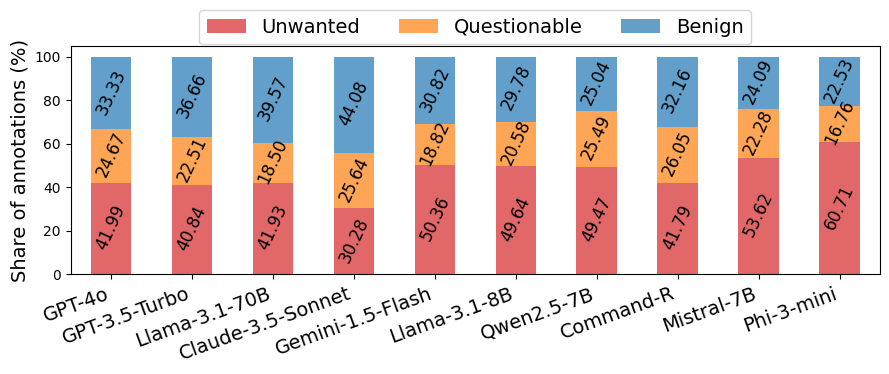

In [4]:
locals()["halu_eval-U-worst"].get_annotation_dist()

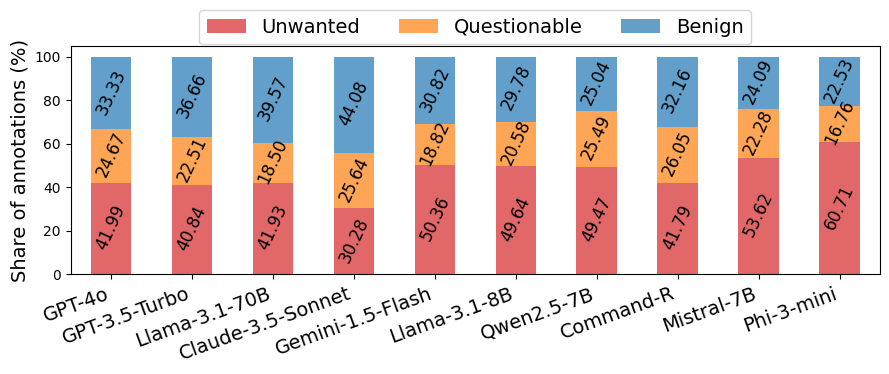

In [13]:
locals()["halu_eval-U-best"].get_annotation_dist()

## Sample-level final label desitribuiton

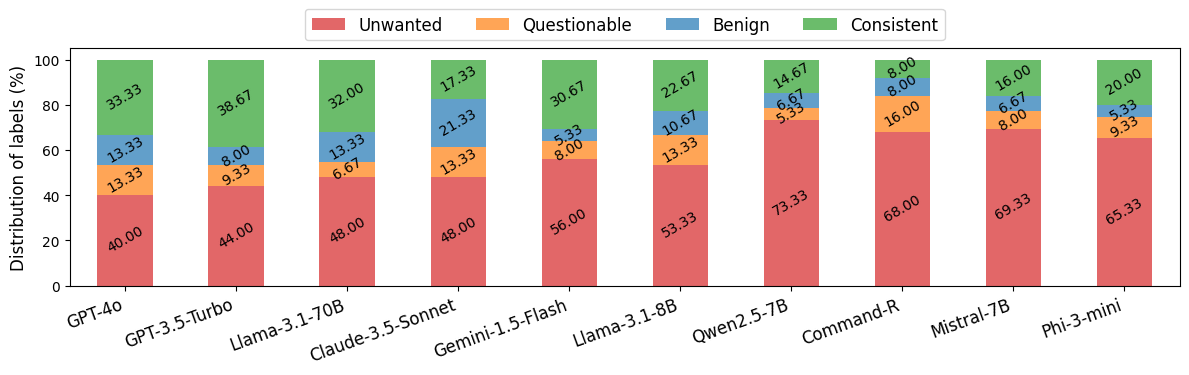

In [5]:
locals()["halu_eval-U-worst"].get_sample_dist()

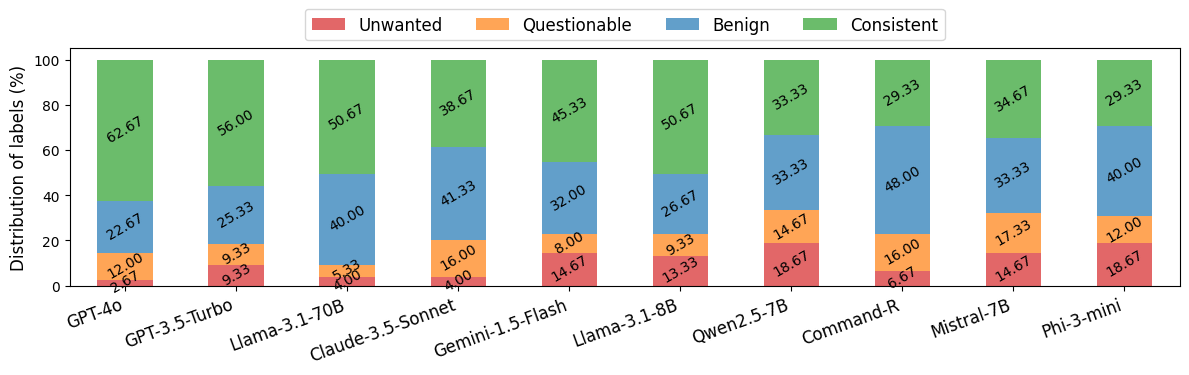

In [6]:
locals()["halu_eval-U-best"].get_sample_dist()

## Hallucination rates vs. passage length

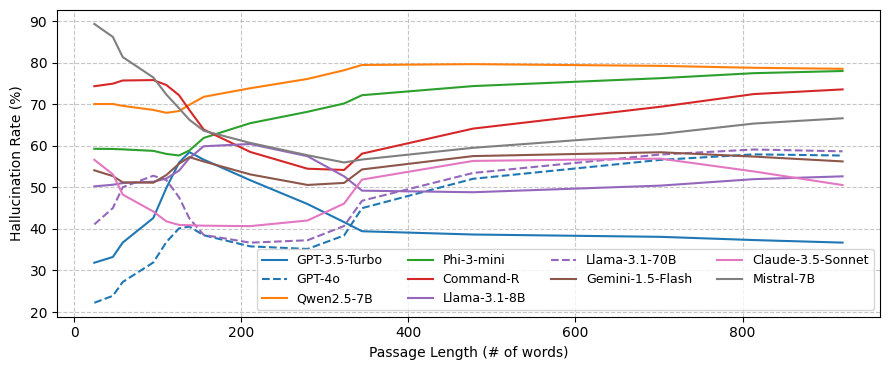

In [7]:
locals()["halu_eval-U-worst"].halu_vs_length('source')

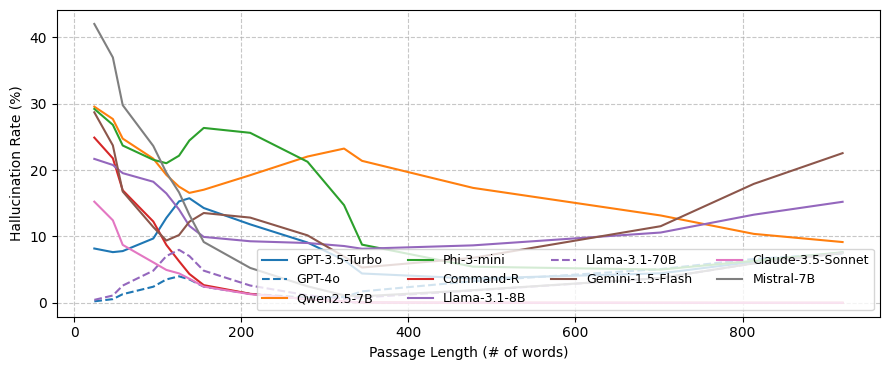

In [8]:
locals()["halu_eval-U-best"].halu_vs_length('source')

## Hallucination rates vs. summary length

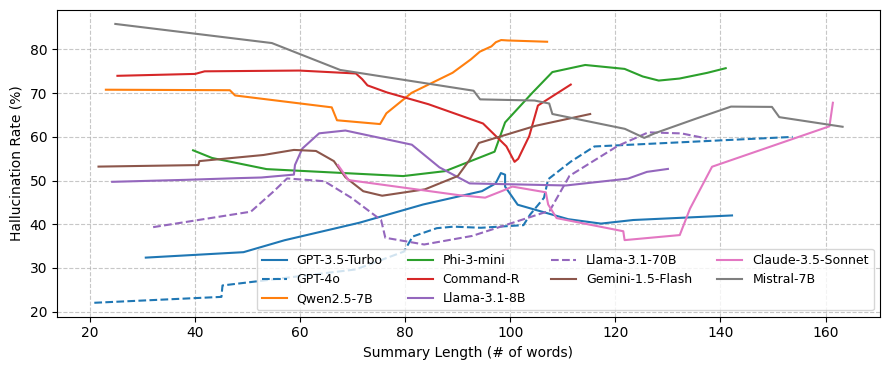

In [9]:
locals()["halu_eval-U-worst"].halu_vs_length('summary')

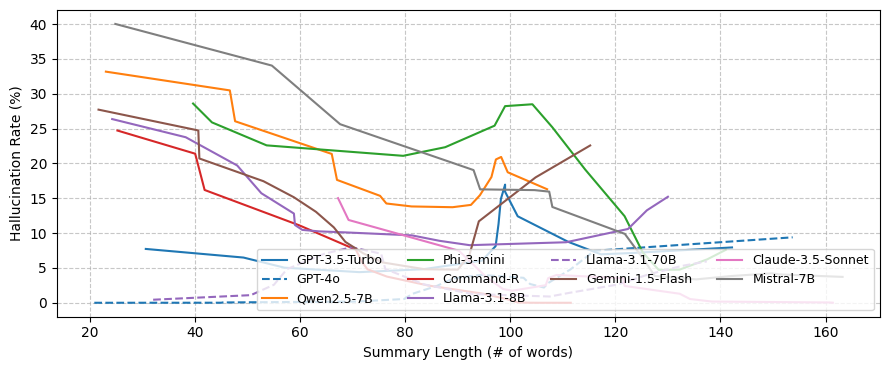

In [10]:
locals()["halu_eval-U-best"].halu_vs_length('summary')

## avg. annotation count vs. passage length 
avg. annotation count: for each sample, number of a label / number of annotators

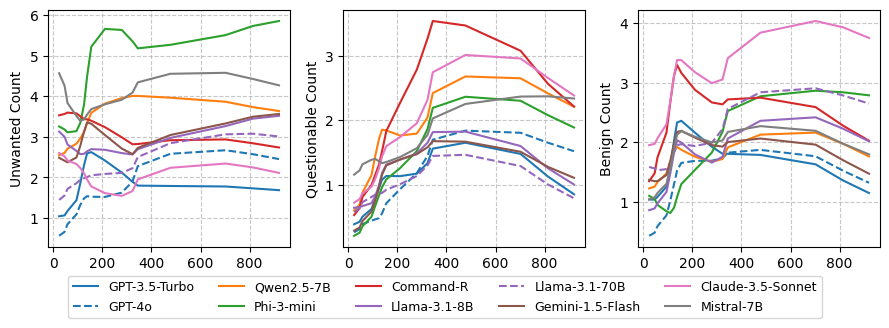

In [11]:
locals()["halu_eval-U-worst"].label_vs_length(mode = 'count', length_of='source')

## annotation ratio vs. passage length

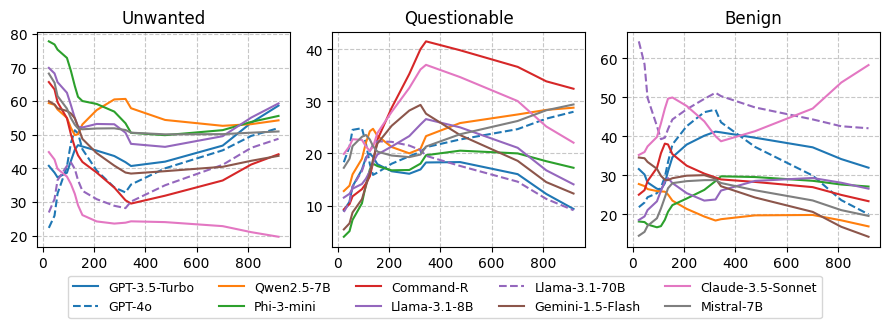

In [12]:
locals()["halu_eval-U-worst"].label_vs_length(mode = 'ratio', length_of='source')